# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

import tensorflow as tf

Using TensorFlow backend.


In [2]:
import pandas as pd
import cv2 

import os
import numpy as np

import time

In [3]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [4]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

from keras.layers import BatchNormalization
from keras.layers import Dropout

import pickle as pkl



## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

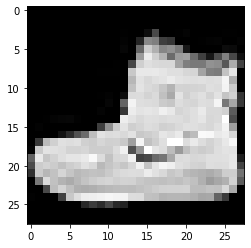

In [5]:
train=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\train.csv")
test=pd.read_csv("D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\test.csv")

train_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\train\\"

##Loading Training Images
train_img=[]
for i in train['id']:
    img=cv2.imread(os.path.join(train_image_path,str(i)+'.png'))
    train_img.append(img)
    

plt.imshow(train_img[0])
plt.show()

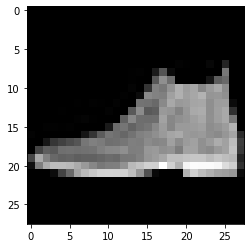

In [6]:
test_image_path="D:\\Hackeathon\\AnalyticsVidhya\\Fashion_MNIST\\test\\"

##Loading Testing Images
test_img=[]
for i in test['id']:
    img=cv2.imread(os.path.join(test_image_path,str(i)+'.png'))
    test_img.append(img)

plt.imshow(test_img[0])

In [7]:
train_label = train['label']

In [8]:
x_data = np.array(train_img)
x_data_sub = np.array(test_img)

In [9]:
x_data_sub.shape

(10000, 28, 28, 3)

In [10]:
x_data.shape

(60000, 28, 28, 3)

In [11]:
train_label.shape

(60000,)

In [12]:
x_data.shape

(60000, 28, 28, 3)

In [13]:
y_data = to_categorical(train_label)

In [14]:
y_data.shape

(60000, 10)

In [15]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [16]:
adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.0,    nesterov=False)
momentum = optimizers.SGD(learning_rate=0.01,
    momentum=0.8,
    nesterov=False)

adamax001 = optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

adamax01 = optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

opts = [adam, sgd, momentum]

In [17]:
def get_Fashion_model_cnn_batch_01():
    model = Sequential()
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [18]:
model = get_Fashion_model_cnn_batch_01()

In [19]:
%%time
history7 = model.fit(x_data, y_data, batch_size=256, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/150
42000/42000 [==============================] - 61s 1ms/step - loss: 1.3320 - accuracy: 0.5600 - val_loss: 0.6781 - val_accuracy: 0.8151
Epoch 2/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.7609 - accuracy: 0.7632 - val_loss: 0.9084 - val_accuracy: 0.6854
Epoch 3/150
42000/42000 [==============================] - 51s 1ms/step - loss: 0.6279 - accuracy: 0.8024 - val_loss: 0.3889 - val_accuracy: 0.8716
Epoch 4/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.5212 - accuracy: 0.8402 - val_loss: 0.9652 - val_accuracy: 0.7565
Epoch 5/150
42000/42000 [==============================] - 51s 1ms/step - loss: 0.4647 - accuracy: 0.8577 - val_loss: 0.2896 - val_accuracy: 0.9022
Epoch 6/150
42000/42000 [==============================] - 51s 1ms/step - loss: 0.4222 - accuracy: 0.8722 - val_loss: 0.3319 - val_accuracy: 0.8891
Epoch 7/150
42000/42000 [==============================] - 51s

KeyboardInterrupt: 

In [ ]:
# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("model_ApperalDetection", save_format="h5")

## Load the saved model

In [9]:
#Image utils
from tensorflow import keras
import cv2

# Model saved with Keras model.save()
MODEL_PATH = 'model_ApperalDetection'
# Load your trained model
loadedModel = keras.models.load_model(MODEL_PATH)


OSError: SavedModel file does not exist at: model_ApperalDetection/{saved_model.pbtxt|saved_model.pb}

In [20]:
testDt = "D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/train/2.png"
image = cv2.imread(testDt)

BS = 256

image_con = image.reshape((1, x_data.shape[0], x_data.shape[1], x_data.shape[2],1))
predIdxs = loadedModel.predict(image_con, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
kv = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
l = dict((k,v) for k,v in kv.items())
prednames = l[predIdxs[0]]
print(prednames)

In [ ]:
testDt = "D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/train/2.png"
image = cv2.imread(testDt)

image_con = image.reshape((x_data.shape[0], x_data.shape[1], x_data.shape[2],1))

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.resize(image, (224, 224))
#image_con = image.reshape((1,224, 224,3))
#image_con = np.array(image_con) / 255.0
predIdxs = loadedModel.predict(image_con, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
kv = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
l = dict((k,v) for k,v in kv.items())
prednames = l[predIdxs[0]]
print(prednames)

In [32]:
#Step 1: Create or open a file with write-binary mode and save the model to it
filenm = 'MNIST_Fashion_2LayerCNN_02he_normal_Adam01.pickle'

#Step 2: Open the saved file with read-binary mode
pickle = pkl.dump(model, open(filenm, 'wb'))

predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})

#Out
Out.to_csv('MNIST_Fashion_DropOut_2LayerCNN_02he_normal_Adam01.csv', header =  ['id', 'label' ], index = None)

## AV Score = 92.9  i.e. 0.92975

In [33]:
def get_Fashion_model_cnn_batch_02():
    model = Sequential()
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [34]:
model = get_Fashion_model_cnn_batch_02()

In [35]:
%%time
history7 = model.fit(x_data, y_data, batch_size=256, epochs=150, verbose=1,
         validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/150
42000/42000 [==============================] - 51s 1ms/step - loss: 1.3488 - accuracy: 0.5544 - val_loss: 0.7911 - val_accuracy: 0.7483
Epoch 2/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.7618 - accuracy: 0.7620 - val_loss: 0.4269 - val_accuracy: 0.8663
Epoch 3/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.6022 - accuracy: 0.8139 - val_loss: 0.4060 - val_accuracy: 0.8614
Epoch 4/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.5085 - accuracy: 0.8429 - val_loss: 0.3842 - val_accuracy: 0.8713
Epoch 5/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.4740 - accuracy: 0.8541 - val_loss: 0.3695 - val_accuracy: 0.8766
Epoch 6/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.4220 - accuracy: 0.8723 - val_loss: 0.3567 - val_accuracy: 0.8843
Epoch 7/150
42000/42000 [==============================] - 50s

Epoch 56/150
42000/42000 [==============================] - 51s 1ms/step - loss: 0.0651 - accuracy: 0.9803 - val_loss: 0.5196 - val_accuracy: 0.9249
Epoch 57/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.0562 - accuracy: 0.9839 - val_loss: 0.4704 - val_accuracy: 0.9284
Epoch 58/150
42000/42000 [==============================] - 50s 1ms/step - loss: 0.1353 - accuracy: 0.9650 - val_loss: 0.4083 - val_accuracy: 0.9311
Epoch 59/150
42000/42000 [==============================] - 51s 1ms/step - loss: 0.0692 - accuracy: 0.9802 - val_loss: 0.4507 - val_accuracy: 0.9262
Epoch 60/150
42000/42000 [==============================] - 51s 1ms/step - loss: 0.0808 - accuracy: 0.9773 - val_loss: 0.4212 - val_accuracy: 0.9306
Epoch 61/150
42000/42000 [==============================] - 53s 1ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.4600 - val_accuracy: 0.9308
Epoch 62/150
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0451 - accuracy: 0.9857

Epoch 111/150
42000/42000 [==============================] - 53s 1ms/step - loss: 0.0560 - accuracy: 0.9840 - val_loss: 0.6090 - val_accuracy: 0.9297
Epoch 112/150
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.6933 - val_accuracy: 0.9259
Epoch 113/150
42000/42000 [==============================] - 52s 1ms/step - loss: 0.1045 - accuracy: 0.9731 - val_loss: 0.5591 - val_accuracy: 0.9205
Epoch 114/150
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.5693 - val_accuracy: 0.9319
Epoch 115/150
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.6125 - val_accuracy: 0.9291
Epoch 116/150
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.5940 - val_accuracy: 0.9337
Epoch 117/150
42000/42000 [==============================] - 52s 1ms/step - loss: 0.0344 - accuracy:

In [36]:
#Step 1: Create or open a file with write-binary mode and save the model to it
filenm = 'MNIST_Fashion_2LayerCNN_02he_normal_Adam02.pickle'

#Step 2: Open the saved file with read-binary mode
pickle = pkl.dump(model, open(filenm, 'wb'))

predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})

#Out
Out.to_csv('MNIST_Fashion_2LayerCNN_02he_normal_Adam02.csv', header =  ['id', 'label' ], index = None)

C:\Users\aasha\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [21]:
def get_model_cnn_batch_simple():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
#99.5 in Digits

In [22]:
def get_Fashion_model_cnn_batch_03():
    model = Sequential()
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(128, (4,4), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(256, (4,4), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adamax(lr = 0.001) 
    model.compile(optimizer=adam, loss='poisson', metrics=['accuracy'])
    
    return model

In [23]:
#model = get_Fashion_model_cnn_batch_03()
model = get_model_cnn_batch_simple()

In [24]:
%%time
history = model.fit(x_data, y_data, batch_size=256, epochs=100, verbose=1,
         validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 9s 223us/step - loss: 0.5407 - accuracy: 0.8119 - val_loss: 0.3593 - val_accuracy: 0.8731
Epoch 2/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.3385 - accuracy: 0.8829 - val_loss: 0.2763 - val_accuracy: 0.8996
Epoch 3/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.2865 - accuracy: 0.8972 - val_loss: 0.2665 - val_accuracy: 0.9015
Epoch 4/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.2539 - accuracy: 0.9105 - val_loss: 0.2987 - val_accuracy: 0.8891
Epoch 5/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.2340 - accuracy: 0.9164 - val_loss: 0.2665 - val_accuracy: 0.9021
Epoch 6/100
42000/42000 [==============================] - 8s 189us/step - loss: 0.2177 - accuracy: 0.9221 - val_loss: 0.2273 - val_accuracy: 0.9179
Epoch 7/100
42000/42000 [==============================]

In [26]:
# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("model_ApperalDetection.h5")

[INFO] saving COVID-19 detector model...


C:\Users\aasha\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


## Load the saved model and compile it

In [11]:
#Image utils
from tensorflow import keras
import cv2

# Model saved with Keras model.save()
MODEL_PATH = 'model_ApperalDetection.h5'
# Load your trained model
loadedModel = keras.models.load_model(MODEL_PATH)

adam = tf.keras.optimizers.Adam(lr = 0.001) 
loadedModel.compile(optimizer=adam, loss='poisson', metrics=['accuracy'])

In [48]:
testDt = "D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/colourimages/sneaker1.jpg"
#"D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/train/314.png"
image = cv2.imread(testDt)

BS = 256
image = cv2.resize(image, (28, 28))
image_con = image.reshape((1, 28, 28,3))
predIdxs = loadedModel.predict(image_con, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
kv = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
l = dict((k,v) for k,v in kv.items())
prednames = l[predIdxs[0]]
print(prednames)

Sneaker


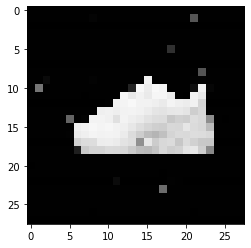

In [49]:
testDt = "D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/colourimages/sneaker1.jpg"
#"D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/train/314.png"
image = cv2.imread(testDt)

BS = 256
image = cv2.resize(image, (28,28))
plt.imshow(image)
plt.show()

(28, 28, 3)


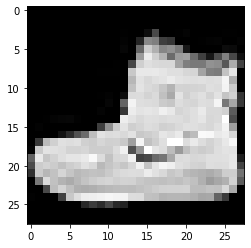

In [38]:
testDt = "D:/Hackeathon/AnalyticsVidhya/Fashion_MNIST/train/1.png"
image = cv2.imread(testDt)
BS = 256
image = cv2.resize(image, (28, 28))
print(image.shape)
plt.imshow(image)
plt.show()

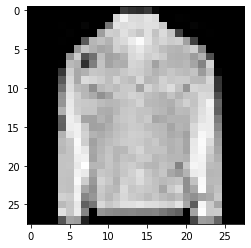

In [21]:

plt.imshow(train_img[29])
plt.show()

In [21]:
#Step 1: Create or open a file with write-binary mode and save the model to it
filenm = 'MNIST_Fashion_2LayerCNN_02he_normal_Adam_Simple.pickle'

#Step 2: Open the saved file with read-binary mode
pickle = pkl.dump(model, open(filenm, 'wb'))

C:\Users\aasha\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [22]:
predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})

#Out
Out.to_csv('MNIST_Fashion_2LayerCNN_02he_normal_Adam_Simple.csv', header =  ['id', 'label' ], index = None)

In [23]:
def get_model_cnn_batch_simple_HS():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    model.add(Dropout(0.5))
    
    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.001) 
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
#99.5 in Digits with relu - 

In [ ]:
def get_Fashion_model_cnn_batch_04():
    model = Sequential()
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(128, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(256, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2))    
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(128, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(256, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Conv2D(32, (3,3), kernel_initializer='he_normal', input_shape=(28,28,3), strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(Conv2D(64, (3,3), kernel_initializer='he_normal', strides = (1,1), padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    
    model.add(MaxPooling2D(2,2)) 
    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('hard_sigmoid'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))
    
    adam = tf.keras.optimizers.Adamax(lr = 0.001) 
    model.compile(optimizer=adam, loss='poisson', metrics=['accuracy'])
    
    return model

In [24]:
model = get_model_cnn_batch_simple_HS()

In [25]:
%%time
history7 = model.fit(x_data, y_data, batch_size=256, epochs=100, verbose=1,
         validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 43s 1ms/step - loss: 1.0971 - accuracy: 0.6585 - val_loss: 1.5235 - val_accuracy: 0.4522
Epoch 2/100
42000/42000 [==============================] - 10s 229us/step - loss: 0.6229 - accuracy: 0.8077 - val_loss: 0.6168 - val_accuracy: 0.8374
Epoch 3/100
42000/42000 [==============================] - 9s 222us/step - loss: 0.4815 - accuracy: 0.8467 - val_loss: 0.3752 - val_accuracy: 0.8799
Epoch 4/100
42000/42000 [==============================] - 10s 241us/step - loss: 0.4110 - accuracy: 0.8670 - val_loss: 0.4654 - val_accuracy: 0.8411
Epoch 5/100
42000/42000 [==============================] - 9s 217us/step - loss: 0.3615 - accuracy: 0.8778 - val_loss: 0.3681 - val_accuracy: 0.8703
Epoch 6/100
42000/42000 [==============================] - 10s 231us/step - loss: 0.3339 - accuracy: 0.8895 - val_loss: 0.3665 - val_accuracy: 0.8827
Epoch 7/100
42000/42000 [=============================

In [27]:
#Step 1: Create or open a file with write-binary mode and save the model to it
filenm = 'MNIST_Fashion_2LayerCNN_02he_normal_Adamsimple_HS.pickle'

#Step 2: Open the saved file with read-binary mode
pickle = pkl.dump(model, open(filenm, 'wb'))

predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)

Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})

#Out
Out.to_csv('MNIST_Fashion_2LayerCNN_02he_normal_Adamsimple_HS.csv', header =  ['id', 'label' ], index = None)

C:\Users\aasha\anaconda3\envs\tfgpu\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


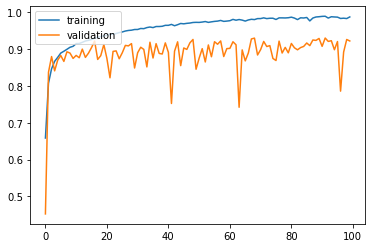

In [26]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## Basic MLP model
- Naive MLP model without any alterations

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (1,1), padding = 'valid'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())


In [24]:
model.output_shape

(None, 1690)

In [25]:
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [26]:
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
history = model.fit(x_train, y_train, batch_size = 250, validation_split = 0.3, epochs = 100, verbose = 1)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
29399/29399 [==============================] - 3s 105us/step - loss: 1.3786 - accuracy: 0.5108 - val_loss: 0.7701 - val_accuracy: 0.6934
Epoch 2/100
29399/29399 [==============================] - 1s 37us/step - loss: 0.6661 - accuracy: 0.7449 - val_loss: 0.6293 - val_accuracy: 0.7598
Epoch 3/100
29399/29399 [==============================] - 1s 37us/step - loss: 0.6172 - accuracy: 0.7724 - val_loss: 0.5838 - val_accuracy: 0.7895
Epoch 4/100
29399/29399 [==============================] - 1s 38us/step - loss: 0.5897 - accuracy: 0.7856 - val_loss: 0.5446 - val_accuracy: 0.8014
Epoch 5/100
29399/29399 [==============================] - 1s 38us/step - loss: 0.5330 - accuracy: 0.8049 - val_loss: 0.5323 - val_accuracy: 0.8094
Epoch 6/100
29399/29399 [==============================] - 1s 38us/step - loss: 0.5139 - accuracy: 0.8165 - val_loss: 0.5849 - val_accuracy: 0.7865
Epoch 7/100
29399/29399 [==============================] - 1s

Epoch 56/100
29399/29399 [==============================] - 1s 37us/step - loss: 0.3024 - accuracy: 0.8956 - val_loss: 0.4053 - val_accuracy: 0.8656
Epoch 57/100
29399/29399 [==============================] - 1s 37us/step - loss: 0.2979 - accuracy: 0.8986 - val_loss: 0.4077 - val_accuracy: 0.8725
Epoch 58/100
29399/29399 [==============================] - 1s 39us/step - loss: 0.2758 - accuracy: 0.9053 - val_loss: 0.3919 - val_accuracy: 0.8732
Epoch 59/100
29399/29399 [==============================] - 1s 36us/step - loss: 0.2762 - accuracy: 0.9050 - val_loss: 0.3844 - val_accuracy: 0.8755
Epoch 60/100
29399/29399 [==============================] - 1s 39us/step - loss: 0.2711 - accuracy: 0.9064 - val_loss: 0.3828 - val_accuracy: 0.8770
Epoch 61/100
29399/29399 [==============================] - 1s 37us/step - loss: 0.2664 - accuracy: 0.9079 - val_loss: 0.4203 - val_accuracy: 0.8691
Epoch 62/100
29399/29399 [==============================] - 1s 36us/step - loss: 0.2872 - accuracy: 0.9040

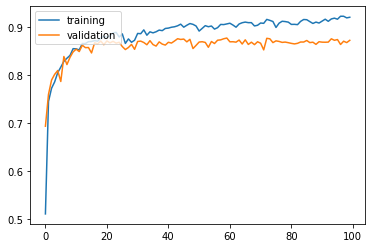

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [29]:
results = model.evaluate(x_test, y_test)

18000/18000 [==============================] - 1s 75us/step


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8645555377006531


## MLP
    Test accuracy:  0.294129341840744
## CNN
    563/563 [==============================] - 1s 2ms/step - loss: 0.6295 - accuracy: 0.8012
    Test accuracy:  0.8011666536331177 - Both Test and train are same
    
    For Adam
    563/563 [==============================] - 1s 2ms/step - loss: 0.5221 - accuracy: 0.8151
    

In [162]:
def mlp_model_LayerSize():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (1,1), padding = 'valid'))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (1,1), padding = 'valid'))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())

    model.add(Dense(200, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))  
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(100, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
        
    model.add(Dense(20, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    optimizers.Adamax(learning_rate=0.001)
    model.compile(optimizer = adamax01, loss = 'poisson', metrics = ['accuracy'])
    
    return model

In [172]:
def mlp_model_LayerSize2by2():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (1,1), padding = 'valid'))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (2,2), padding = 'valid'))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())

    model.add(Dense(200, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))  
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(100, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
        
    model.add(Dense(20, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    optimizers.Adamax(learning_rate=0.001)
    model.compile(optimizer = adamax01, loss = 'poisson', metrics = ['accuracy'])
    
    return model

In [163]:
def mlp_model_LayerSize2():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())

    model.add(Dense(200, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    
    model.add(Dense(100, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(20, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=True,
    name='Adam')
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [164]:
model = mlp_model_LayerSize()
history = model.fit(x_train, y_train, batch_size = 250, validation_split = 0.3, epochs = 100, verbose = 1)

results = model.evaluate(x_test, y_test)

print('Accuracy', results[1])

Epoch 1/100
118/118 [==============================] - 5s 41ms/step - loss: 0.1844 - accuracy: 0.7165 - val_loss: 0.1516 - val_accuracy: 0.8220
Epoch 2/100
118/118 [==============================] - 5s 39ms/step - loss: 0.1572 - accuracy: 0.8019 - val_loss: 0.1445 - val_accuracy: 0.8398
Epoch 3/100
118/118 [==============================] - 5s 40ms/step - loss: 0.1502 - accuracy: 0.8277 - val_loss: 0.1433 - val_accuracy: 0.8481
Epoch 4/100
118/118 [==============================] - 5s 40ms/step - loss: 0.1464 - accuracy: 0.8407 - val_loss: 0.1395 - val_accuracy: 0.8606
Epoch 5/100
118/118 [==============================] - 5s 41ms/step - loss: 0.1445 - accuracy: 0.8502 - val_loss: 0.1381 - val_accuracy: 0.8645
Epoch 6/100
118/118 [==============================] - 5s 41ms/step - loss: 0.1422 - accuracy: 0.8561 - val_loss: 0.1418 - val_accuracy: 0.8472
Epoch 7/100
118/118 [==============================] - 5s 41ms/step - loss: 0.1406 - accuracy: 0.8633 - val_loss: 0.1400 - val_accuracy:

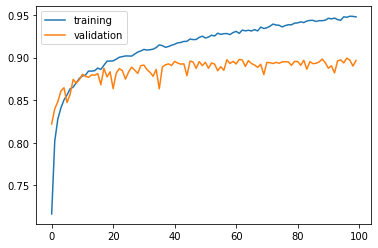

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [166]:
predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut_CNN_Adamax_Poisson.csv', header =  ['id', 'label' ], index = None)

In [173]:
model = mlp_model_LayerSize2by2()
history = model.fit(x_train, y_train, batch_size = 200, validation_split = 0.3, epochs = 150, verbose = 1)

results = model.evaluate(x_test, y_test)

print('Accuracy', results[1])

Epoch 1/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1987 - accuracy: 0.6591 - val_loss: 0.1572 - val_accuracy: 0.7980
Epoch 2/150
147/147 [==============================] - 4s 30ms/step - loss: 0.1612 - accuracy: 0.7871 - val_loss: 0.1460 - val_accuracy: 0.8304
Epoch 3/150
147/147 [==============================] - 4s 30ms/step - loss: 0.1542 - accuracy: 0.8129 - val_loss: 0.1441 - val_accuracy: 0.8399
Epoch 4/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1499 - accuracy: 0.8297 - val_loss: 0.1442 - val_accuracy: 0.8388
Epoch 5/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1476 - accuracy: 0.8384 - val_loss: 0.1430 - val_accuracy: 0.8445
Epoch 6/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1450 - accuracy: 0.8450 - val_loss: 0.1430 - val_accuracy: 0.8453
Epoch 7/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1440 - accuracy: 0.8506 - val_loss: 0.1407 - val_accuracy:

147/147 [==============================] - 5s 31ms/step - loss: 0.1211 - accuracy: 0.9268 - val_loss: 0.1326 - val_accuracy: 0.8980
Epoch 114/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1207 - accuracy: 0.9284 - val_loss: 0.1328 - val_accuracy: 0.8992
Epoch 115/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1207 - accuracy: 0.9279 - val_loss: 0.1331 - val_accuracy: 0.8998
Epoch 116/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1201 - accuracy: 0.9310 - val_loss: 0.1345 - val_accuracy: 0.8934
Epoch 117/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1201 - accuracy: 0.9318 - val_loss: 0.1347 - val_accuracy: 0.8960
Epoch 118/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1205 - accuracy: 0.9283 - val_loss: 0.1333 - val_accuracy: 0.8989
Epoch 119/150
147/147 [==============================] - 5s 31ms/step - loss: 0.1205 - accuracy: 0.9290 - val_loss: 0.1337 - val_accuracy:

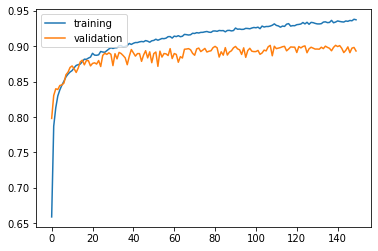

In [174]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [175]:
predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut_2LayerCNN_Adamax_Poisson_2by2.csv', header =  ['id', 'label' ], index = None)

In [18]:
def mlp_model_LayerSize1by1():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 32,
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('elu'))    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 64,
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 32,
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('elu'))    
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 64,
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    
    
    model.add(Flatten())
    
        
    model.add(Dense(128, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    optimizers.Adamax(learning_rate=0.001)
    model.compile(optimizer = adamax01, loss = 'poisson', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model_LayerSize1by1()
history = model.fit(x_train, y_train, batch_size = 200, validation_split = 0.3, epochs = 10, verbose = 1)

results = model.evaluate(x_test, y_test)

print('Accuracy', results[1])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [191]:
predicted = model.predict(x_data_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut_2LayerCNN_Same.csv', header =  ['id', 'label' ], index = None)

## mlp_model_LayerSize - 
    563/563 [==============================] - 1s 2ms/step - loss: 0.7473 - accuracy: 0.9103
    Accuracy 0.910277783870697

In [140]:
def add_Convl():
    model.add(Conv2D(input_shape = (x_data.shape[1], x_data.shape[2], x_data.shape[3]), 
                 filters = 10,
                 kernel_size = (3,3), strides = (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())


In [27]:
# from now on, create a function to generate (return) models
def mlp_model_tune_Dense(denseCount):
    model = Sequential()
    
    model.add(Dense(denseCount, input_shape = (784, )))     # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(denseCount ))                            # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(denseCount))                            # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(denseCount))                            # use he_normal initializer
    model.add(Activation('hard_sigmoid'))    
    model.add(Dense(10))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd_NM = optimizers.SGD(lr = 0.01, momentum=0.8, nesterov=True)
    adam001 = optimizers.Adam(lr = 0.001)
    adam01 = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam001, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
for i in [50,100]:

    model = mlp_model_tune_Dense(i)
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 150, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

1257/1257 [==============================] - 2s 2ms/step - loss: 0.8008 - accuracy: 0.7104
Test accuracy for dense: 50  is 0.7103731632232666
1257/1257 [==============================] - 2s 2ms/step - loss: 0.8036 - accuracy: 0.6955
Test accuracy for dense: 100  is 0.6955472826957703


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [71]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('elu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [73]:
    model = mlp_model()
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.8952
Test accuracy for dense: 69999.png  is 0.895217776298523


In [51]:
for i in [30,50,60,64,70]:

    model = mlp_model_tune_Dense(i)
    history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)
    results = model.evaluate(x_test, y_test)
    print('Test accuracy for dense:', i,' is', results[1])

NameError: name 'mlp_model_tune_Dense' is not defined

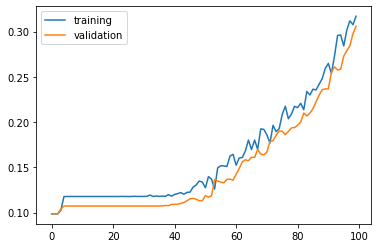

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [23]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 727us/step - loss: 2.2042 - accuracy: 0.30990s - loss: 2.2038 - accuracy - ETA: 0s - loss: 2.2036 - accu


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.30986902117729187


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>
<img src="https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png" style="width: 400px"/>
<center> **Comparision of activation** </center>

In [34]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [35]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

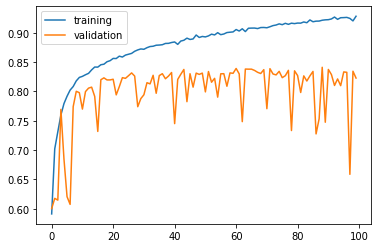

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [37]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 2ms/step - loss: 0.6456 - accuracy: 0.8185


In [38]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8185074329376221


In [39]:
import numpy as np
import pandas as pd

In [41]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_App_Elu_SGD.csv', header =  ['id', 'label' ], index = None)

## ELU Adam 

In [47]:
adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.0,    nesterov=False,    name='SGD')
momentum = optimizers.SGD(learning_rate=0.01,
    momentum=0.8,
    nesterov=False,
    name='SGD-Momentum')
opts = [adam, sgd, momentum]
adam001 = optimizers.Adam(lr = 0.001)

In [48]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))    
    
    model.compile(optimizer = adam001, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

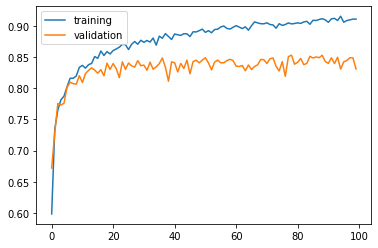

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [50]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 2ms/step - loss: 0.6024 - accuracy: 0.8357


In [51]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8356716632843018


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [26]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

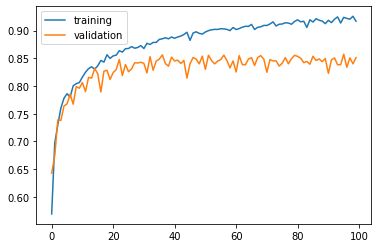

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [29]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 1s 856us/step - loss: 0.7265 - accuracy: 0.8489


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.84885573387146


In [31]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['id'],y_pred]).T
Out.rename(columns = {0:'id', 1:'label'})
#Out
Out.to_csv('MNIST_App_Elu_adam_HENorm.csv', header =  ['id', 'label' ], index = None)

## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [12]:
from keras.layers import BatchNormalization

In [21]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001) 
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

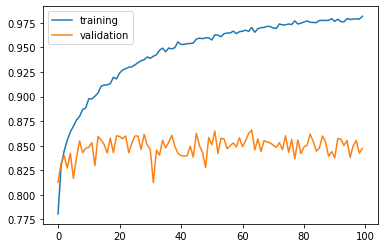

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [24]:
results = model.evaluate(x_test, y_test)

1257/1257 [==============================] - 2s 2ms/step - loss: 0.7453 - accuracy: 0.8524


In [25]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8524377942085266


In [67]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_App_Batch_Elu_LR_0_001_Adam.csv', header =  ['filename', 'label' ], index = None)

KeyError: 'filename'

## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [63]:
from keras.layers import Dropout

In [64]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.3))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

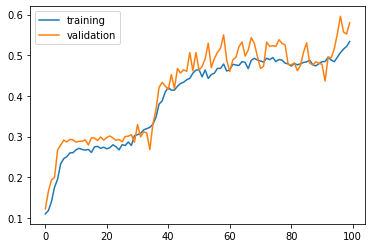

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [67]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 1s 797us/step - loss: 1.1125 - accuracy: 0.5871


In [68]:
print('Test accuracy: ', results[1])

Test accuracy:  0.587115466594696


In [69]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_DropOut.csv', header =  ['filename', 'label' ], index = None)

## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [91]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [93]:
def mlp_model1():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model2():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model3():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [94]:
model1 = KerasClassifier(build_fn = mlp_model1, epochs = 30, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model2, epochs = 10, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model3, epochs = 20, verbose = 0)

In [95]:
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model3._estimator_type = "classifier"

In [96]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [97]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B19C8>),
                             ('model2',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1748>),
                             ('model3',
                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023E479B1788>)],
                 voting='soft')

In [98]:
y_pred = ensemble_clf.predict(x_test)

In [99]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.9627474870545233


In [100]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Ensemble.csv', header =  ['filename', 'label' ], index = None)

## Tuning by Learning rate & decaying rate

In [77]:
from keras.layers import BatchNormalization

In [78]:
# solution
epochs = 100
learning_rate = 0.01 # initial learning rate
decay_rate = 0.01
momentum = 0.8

# define the optimizer function
adam = optimizers.Adam(lr=learning_rate)

In [79]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

def mlp_model_initial():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))  
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [80]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

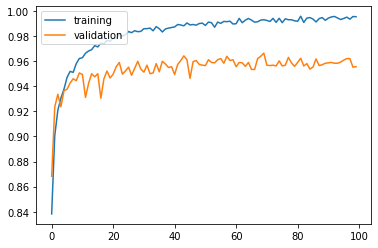

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [82]:
results = model.evaluate(x_test, y_test)

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1968 - accuracy: 0.9639


In [83]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9639354348182678


In [84]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_LR_0_1_Adam.csv', header =  ['filename', 'label' ], index = None)

#### With Elu & batch - Test accuracy:  0.963965892791748 - AV Accu - 96.7

#### With Elu, batch & Initializer - Test accuracy:  0.9626560807228088 - AV Accu - 96.5

In [88]:
def mlp_model_Initialization_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [89]:
for i in ['he_normal','random_normal','truncated_normal']:
    model = mlp_model_Initialization_Test(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2077 - accuracy: 0.9634
Test accuracy:  0.9634480476379395
1026/1026 [==============================] - 2s 2ms/step - loss: 0.2505 - accuracy: 0.9568
Test accuracy:  0.9568077921867371


In [96]:
model = mlp_model_Initialization_Test('truncated_normal')
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

results = model.evaluate(x_test, y_test)

print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2697 - accuracy: 0.9571
Test accuracy:  0.9571428298950195


In [97]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_TrucNormalInit_100Epo.csv', header =  ['filename', 'label' ], index = None)

In [93]:
from tensorflow.keras import layers
from tensorflow.keras import initializers

In [98]:
def mlp_model_Initialization_ObjTest(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = i))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model


In [101]:
import keras

initList = [keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
,keras.initializers.Ones()
,keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
,keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
,keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)
,keras.initializers.Orthogonal(gain=1.0, seed=None)
,keras.initializers.lecun_uniform(seed=None)
,keras.initializers.glorot_normal(seed=None)
,keras.initializers.glorot_uniform(seed=None)
,keras.initializers.he_normal(seed=None)
,keras.initializers.lecun_normal(seed=None)
,keras.initializers.he_uniform(seed=None)]

In [102]:
for i in initList:
    model = mlp_model_Initialization_ObjTest(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Test accuracy: ', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1843 - accuracy: 0.9547
Test accuracy:  0.9547365307807922
1026/1026 [==============================] - 2s 2ms/step - loss: 0.4724 - accuracy: 0.8742
Test accuracy:  0.8742004036903381
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1759 - accuracy: 0.9555
Test accuracy:  0.9555284976959229
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1861 - accuracy: 0.9528
Test accuracy:  0.9528175592422485
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9580
Test accuracy:  0.9579652547836304
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1953 - accuracy: 0.9512
Test accuracy:  0.9512031674385071
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1644 - accuracy: 0.9580
Test accuracy:  0.9580261707305908
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1998 - accuracy: 0.9521
Test accuracy:  0.952116966

In [103]:
print('Test accuracy with Init:', i.distribution,' is', results[1])

Test accuracy with Init: <tensorflow.python.keras.initializers.initializers_v2.HeUniform object at 0x0000021E87B9BFC8>  is 0.9559853672981262


In [108]:
for i in initList:
    model = mlp_model_Initialization_ObjTest(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy-Init:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2060 - accuracy: 0.9620
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.RandomUniform object at 0x0000021E87B9B1C8>  is 0.9620164632797241
1026/1026 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.9219
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.Ones object at 0x0000021E87B9B848>  is 0.921870231628418
1026/1026 [==============================] - 2s 2ms/step - loss: 0.2337 - accuracy: 0.9611
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.RandomNormal object at 0x0000021E87B9B888>  is 0.9610722064971924
1026/1026 [==============================] - 1s 938us/step - loss: 0.2251 - accuracy: 0.9634
Accuracy-Init: <tensorflow.python.keras.initializers.initializers_v2.TruncatedNormal object at 0x0000021E87B9BDC8>  is 0.9634480476379395
1026/1026 [==============================] - 1s 941us/step - loss: 0.2090 - accuracy: 0.9623
Accura

## Tune Optimizers

In [117]:
adam = optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam')
sgd = optimizers.SGD(learning_rate=0.01,momentum=0.0,    nesterov=False,    name='SGD')
momentum = optimizers.SGD(learning_rate=0.01,
    momentum=0.8,
    nesterov=False,
    name='SGD-Momentum')
opts = [adam, sgd, momentum]

In [121]:
def mlp_model_Optimization_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = i, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [122]:
for i in opts:
    model = mlp_model_Optimization_Test(i)
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2036 - accuracy: 0.9647
Accuracy with: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000021EA06C3948>  is 0.964666485786438
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1776 - accuracy: 0.9559
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3848>  is 0.9559244513511658
1026/1026 [==============================] - 2s 2ms/step - loss: 0.1848 - accuracy: 0.9612
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9612244963645935


In [126]:
    model = mlp_model_Optimization_Test(opts[0])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1726 - accuracy: 0.9568
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9568077921867371


In [ ]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerAdam.csv', header =  ['filename', 'label' ], index = None)

In [ ]:
    model = mlp_model_Optimization_Test(opts[1])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

In [127]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerSGD.csv', header =  ['filename', 'label' ], index = None)

In [128]:
    model = mlp_model_Optimization_Test(opts[2])
    history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

    results = model.evaluate(x_test, y_test)

    print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9640
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.9639963507652283


In [129]:
predicted = model.predict(X_test_sub)
y_pred = predicted.argmax(axis=1)


ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([test['filename'],y_pred]).T
Out.rename(columns = {0:'filename', 1:'label'})
#Out
Out.to_csv('MNIST_Prediction_Batch_Elu_OptimizerMomentum.csv', header =  ['filename', 'label' ], index = None)

## Tune Activation

In [130]:
def mlp_model_Activation_Test(i):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(50, kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation(i))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate=0.01,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name='Adam')
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
ActList = ['relu']

In [132]:
model = mlp_model_Activation_Test('selu')
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, verbose = 0)

results = model.evaluate(x_test, y_test)

print('Accuracy with:', i,' is', results[1])

1026/1026 [==============================] - 2s 2ms/step - loss: 0.2208 - accuracy: 0.9628
Accuracy with: <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000021EA06C3DC8>  is 0.962838888168335
